In [1]:
import numpy as np
from matplotlib import pyplot as plt

from landlab import RasterModelGrid, imshow_grid
from landlab.components import (
    ChannelProfiler,
    ChiFinder,
    FlowAccumulator,
    SteepnessFinder,
    StreamPowerEroder,
    LinearDiffuser,
)
from landlab.io import write_esri_ascii
from landlab.io import read_esri_ascii


In [2]:
(mg, z) = read_esri_ascii("aster30_raster.asc", name="topographic__elevation")

/home/tarangui/.conda/envs/Salar_env/lib/python3.7/site-packages/landlab/plot/imshow.py:267: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("pink"))
  cmap.set_bad(color=color_for_closed)
/home/tarangui/.conda/envs/Salar_env/lib/python3.7/site-packages/landlab/plot/imshow.py:307: MatplotlibDeprecationWarning: The 'norm' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cb = plt.colorbar(norm=norm, shrink=shrink)


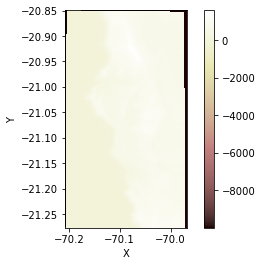

In [3]:
%matplotlib inline
imshow_grid(mg, "topographic__elevation")

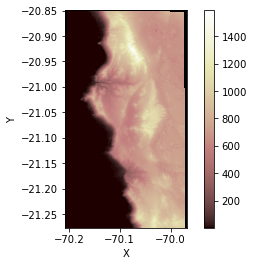

In [6]:
min_z = np.min(z[np.where(z > 0)])
max_z = np.max(z[np.where(z > 0)])
#help(imshow_grid)
imshow_grid(mg, 'topographic__elevation', limits=(min_z, max_z))

In [7]:
mg.status_at_node[np.isclose(z, -9999.)] = mg.BC_NODE_IS_CLOSED
#mg.set_watershed_boundary_condition('topographic__elevation')

ValueError: Grid has two potential outlet nodes.They have the following node IDs: 
[   2910    2911    2912 ..., 1322789 1322790 1322791]
Use the method set_watershed_boundary_condition_outlet_id to explicitly select one of these IDs as the outlet node.

In [8]:
mg.status_at_node[2910]= mg.BC_NODE_IS_FIXED_VALUE #THIS SHOULD MAKE THIS RUN FASTER

In [ ]:
fr = FlowAccumulator(mg, 'topographic__elevation', flow_director='D8',depression_finder='DepressionFinderAndRouter')
fr.run_one_step()

In [9]:
# Plot channel profiles
profiler = ChannelProfiler(mg,number_of_watersheds =1, minimum_channel_threshold  = 1e5, main_channel_only =False,)
profiler.run_one_step()
            
plt.figure()
imshow_grid(mg,"topographic__elevation")


KeyboardInterrupt: 